In [1]:
using LinearAlgebra
using CairoMakie
CairoMakie.activate!(type = "svg")
using AlgebraOfGraphics
set_aog_theme!()

In [2]:
numero_pontos_tempo  = 51
numero_pontos_espaco = 51

c = 1 # velocidade da onda
t = range(0,1,length = numero_pontos_tempo)
x = range(0,1,length = numero_pontos_espaco)
dt = t[2] - t[1]
dx = x[2] - x[1]

f = sin.(π*x) #valor inicial
u = zeros(numero_pontos_tempo, numero_pontos_espaco) #valor inicial
w = zeros(numero_pontos_tempo, numero_pontos_espaco) #valor inicial

u[1,1:end] = f;
w[1,1:end] = f;

In [3]:
for tk in 1:numero_pontos_tempo-1
    for xk in 1:numero_pontos_espaco
        xk_esquerda = xk - 1
        if xk_esquerda <= 0
            xk_esquerda = numero_pontos_espaco
        end
        xk_direita = xk + 1
        if xk_direita > numero_pontos_espaco
            xk_direita = 1
        end
        
        # passo de Euler
        u[tk+1,xk] = u[tk,xk]-c*(u[tk,xk_direita]-u[tk,xk])*(dt/dx)
        w[tk+1,xk] = w[tk,xk]-c*(w[tk,xk]-w[tk,xk_esquerda])*(dt/dx)
    end
end

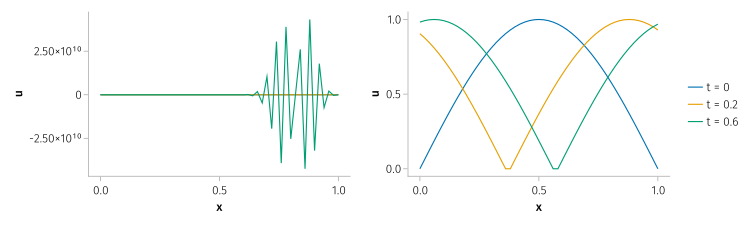

In [4]:
fig = Figure(resolution = (1000, 300))
df1 = (
    x,
    t0 = u[1,1:end],
    t2 = u[20,1:end],
    t6 = u[30,1:end])

df2 = (
    x,
    t0 = w[1,1:end],
    t2 = w[20,1:end],
    t6 = w[30,1:end])

labels = ["t = 0", "t = 0.2", "t = 0.6"]
plt1 = data(df1) * mapping(:x,[:t0, :t2, :t6] .=> "u",color=dims(1) => renamer(labels)) *
    visual(Lines)

plt2 = data(df2) * mapping(:x, [:t0, :t2, :t6] .=> "u",color=dims(1) => renamer(labels)) *
    visual(Lines)
ag = draw!(fig[1,1],plt1)
ag = draw!(fig[1,2],plt2)
legend!(fig[1, 3], ag, orientation=:vertical)
fig

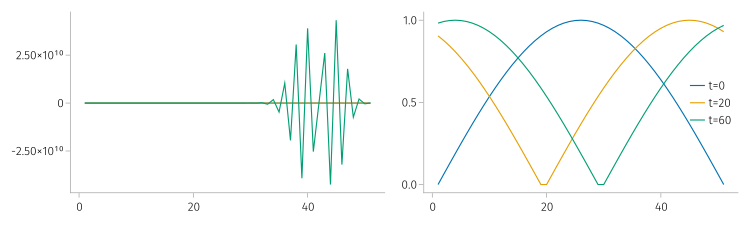

In [5]:
fig = Figure(resolution = (1000, 300))

ax1, l1 = lines(fig[1,1] , u[1,1:end], label="t=0")
lines!(fig[1,1], u[20,1:end], label="t=20")
lines!(fig[1,1], u[30,1:end], label="t=60")

ax2, l2 = lines(fig[1,2] , w[1,1:end], label="t=0")
lines!(fig[1,2], w[20,1:end], label="t=20")
lines!(fig[1,2], w[30,1:end], label="t=60")
axislegend(position=(:right,:center))
# current_figure()
# Legend(fig[1, 3], [l1, l2], ["t=0", "t=20", "t=60"])
fig

## Heat Equation

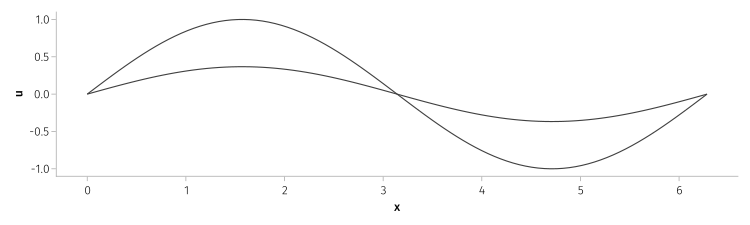

In [62]:
N=100;
x=LinRange(0,2*pi,N)
dx=x[2]-x[1];
 
u=zeros(N);
up=zeros(N);
initial =zeros(N)
 
for i=1:N
   u[i]=sin(x[i]);
   initial[i] =sin(x[i]);
end
 
tEnd=1;
t=0;
dt=.5*dx^2;
 
fig = Figure(resolution = (1000, 300))
while (t <= tEnd)
   for i=2:N-1
      up[i]=u[i]+dt*(u[i+1]+u[i-1]-2*u[i])/dx/dx;
   end
   u[1]=0; u[N]=0;
   for i=1:N
      u[i]=up[i];
   end
   global t+=dt
end
df = (x, u=u, uo=initial)

plt1 = data(df) * mapping(:x,[:u, :uo] .=> "u") * visual(Lines)
ag = draw!(fig[1,1],plt1)
fig